# 1.0 Imports 

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import math 
%matplotlib inline

# 2.0 Gather

## 2.1 Getting the image predections tsv file 

In [219]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(request.content)

335079

## 2.3 Getting the ids from the twitter Archive DF

In [221]:
twitterArchiveDF = pd.read_csv("twitter-archive-enhanced.csv")
ids = list (twitterArchiveDF["tweet_id"])

## 2.4 Getting data from tweepy

In [222]:
numberOfIteration = math.ceil (len(ids) / 100)
jsonsList = []

for iteration in range (numberOfIteration):
    tempDict = {}
    if ((iteration+1)*100 < len(ids)):
        result = api.statuses_lookup(id_=ids[iteration*100:(iteration+1)*100])
    else :
        result = api.statuses_lookup(id_=ids[iteration*100:len(ids)])
        
    for status in result:
        
        statusJson = status._json
        jsonsList.append({'tweet_id':status._json['id'],
                          'favorite_count':status._json['favorite_count'],
                          'retweet_count':status._json['retweet_count']})

## 2.5 Writing the result to file 

In [223]:
with open('tweet_json.txt', 'w') as f:
    f.write('tweet_id,favorite_count,retweet_count\n')
    for item in jsonsList:
        f.write("{},{},{}\n".format(item['tweet_id'],item['favorite_count'],item['retweet_count']))

## 2.6 Reading data from tweet_json.txt 

In [224]:
tweetInfoDF = pd.read_csv('tweet_json.txt', sep=",", header=0)
tweetInfoDF.head()

,tweet_id,favorite_count,retweet_count
0,876484053909872640,17286,2097
1,886366144734445568,19361,2793
2,877611172832227328,0,71
3,888078434458587136,19964,3063
4,891689557279858688,38583,7624


## 2.7 Reading data from image-predictions.tsv

In [225]:
imagePredictionsDF = pd.read_csv("image-predictions.tsv",sep='\t')
imagePredictionsDF.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# 3.0 Assessing Data 

## 3.1 twitterArchiveDF

In [226]:
twitterArchiveDF.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [227]:
# Check general info
twitterArchiveDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [228]:
# Check if there are duplicates 
sum(twitterArchiveDF.duplicated())

0

### 3.1.1 Issues for twitterArchiveDF Dataframe
* There are missing values.
* ***'timestamp'*** column needs to be a date not an object.
* ***'retweeted_status_timestamp'*** column needs to be a date not an object.
* The columns *** doggo, floofer, pupper, puppo *** columns should be combined into a single column
* This project is done by Eng.Shimaa Badawy

## 3.2 tweetInfoDF

In [229]:
# Exploring the dataframe
tweetInfoDF.head()

,tweet_id,favorite_count,retweet_count
0,876484053909872640,17286,2097
1,886366144734445568,19361,2793
2,877611172832227328,0,71
3,888078434458587136,19964,3063
4,891689557279858688,38583,7624


In [230]:
# Check general info
tweetInfoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [231]:
# Check if there are duplicates 
sum(tweetInfoDF.duplicated())

0

In [232]:
# Testing the len of the dataframe
len (tweetInfoDF)

2331

## 3.3 imagePredictionsDF

In [233]:
# Exploring the dataframe
imagePredictionsDF.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [234]:
# Check general info
imagePredictionsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [235]:
# Check if there are duplicates 
sum(imagePredictionsDF.duplicated())

0

In [236]:
# Check the length of the dataframe
len (imagePredictionsDF)

2075

### 3.3.1 Issues in imagePredictionDF
* Columns names need to be more clear.

## 3.4 Merging 

In [237]:
tempMergedDF =pd.merge(left=twitterArchiveDF,right=tweetInfoDF,on='tweet_id',how='outer')
finalDF = pd.merge(left=tempMergedDF,right=imagePredictionsDF,on='tweet_id',how='outer')
finalDF.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## 3.4 Results:
### 3.4.1 Issues 
* Some tweets does not have ***retweet_count*** or ***favorite_count***.
* Some columns have missing values. For example:
    * Number of record in the tweetInfoDF is ***2331*** instead of ***2356***
    * Number of record in the tweetInfoDF is ***2075*** instead of ***2356***
* Time and date columns need to be converted from an object to date type
    * ***'timestamp'*** colume has type of an object, should be date type.
    * ***'retweeted_status_timestamp'*** column needs to be a date not an object.
    * This project is done by Eng.Shimaa Badawy @shbadawy
* Some columns name needs to be renamed
    * ***'expanded_urls'*** needs to be renamed to ***tweet_urls*** .
    * ***'p1'***,***'p1_conf'*** and ***'p1_dog'***, needs to be ***'prediction_1_name'*** ,***'confident_of_class_1'***, ***'is_class_1_dog'*** respectivly. And so on in p2 and p3 ( This project is done by Eng.Shimaa Badawy @shbadawy).
* Some images are not classified correctly ***(p1_dog,p2_dog and p3_dog is False)***.
* The columns doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column
* Remove retweet-related columns as they are not related to our research
* Rows that have retweet valuse need to be removed 

### 3.4.2 Tidiness
* The three dataframes should be merged as they are part of the same observational unit.
* ***timestamp*** and ***retweeted_status_timestamp*** needs to be separated to date and time.

# 4.0 Cleaning 

In [238]:
# Copying the original dataframe to modify and clean the copy and be able to get back to the original one
copyDF = finalDF.copy()
copyDF.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

## 4.1 Renaming columns

In [239]:
copyDF.rename(columns={'p1':'prediction_1_name', 'p1_conf':'confident_of_class_1', 'p1_dog':'is_class_1_dog'}, inplace =True)
copyDF.rename(columns={'p2':'prediction_2_name', 'p2_conf':'confident_of_class_2', 'p2_dog':'is_class_2_dog'}, inplace =True)
copyDF.rename(columns={'p3':'prediction_3_name', 'p3_conf':'confident_of_class_3', 'p3_dog':'is_class_3_dog'}, inplace =True)
copyDF.rename(columns={'expanded_urls':'tweet_url'}, inplace =True)

In [240]:
# Checking the columns names and make sure that they are modified as intended
# This project is done by Eng.Shimaa Badawy @shbadawy
copyDF.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'tweet_url', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'prediction_1_name', 'confident_of_class_1', 'is_class_1_dog',
       'prediction_2_name', 'confident_of_class_2', 'is_class_2_dog',
       'prediction_3_name', 'confident_of_class_3', 'is_class_3_dog'],
      dtype='object')

## 4.2 Changing the timestamps types to date 

In [241]:
copyDF['timestamp'] = pd.to_datetime(copyDF['timestamp'])
copyDF['retweeted_status_timestamp'] = pd.to_datetime(copyDF['retweeted_status_timestamp'])

In [242]:
# Testing if the mofidifications are applied
copyDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   tweet_url                   2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## 4.3 Separating date and time 

In [243]:
copyDF['tweet_date'] = copyDF['timestamp'].dt.date
copyDF['tweet_time'] = copyDF['timestamp'].dt.time
copyDF.drop('timestamp', inplace = True, axis = 1)

copyDF.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_url,rating_numerator,...,confident_of_class_1,is_class_1_dog,prediction_2_name,confident_of_class_2,is_class_2_dog,prediction_3_name,confident_of_class_3,is_class_3_dog,tweet_date,tweet_time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24


## 4.4 Adding the type name column 

In [244]:
# Defining a new column called "type" to help in getting the insights for each dog type
typeNameList = []

for i in range(len(copyDF) ):
    row = copyDF.iloc[i]
    if (row['is_class_1_dog'] == True) :
        typeNameList.append(row['prediction_1_name'])
    elif (row['is_class_2_dog'] == True): 
        typeNameList.append(row['prediction_2_name'])
    elif (row['is_class_3_dog'] == True) :
        typeNameList.append(row['prediction_3_name'])
    else:
        typeNameList.append("NaN")
copyDF["type_name"] = typeNameList

In [245]:
# Checking modifications
copyDF.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_url,rating_numerator,...,is_class_1_dog,prediction_2_name,confident_of_class_2,is_class_2_dog,prediction_3_name,confident_of_class_3,is_class_3_dog,tweet_date,tweet_time,type_name
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27,Chihuahua
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03,Chihuahua
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51,Labrador_retriever
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24,basset


## 4.5 Handling the None value in the dogs stage columns

In [246]:
copyDF['doggo'].replace('None', '', inplace=True)
copyDF['floofer'].replace('None', '', inplace=True)
copyDF['pupper'].replace('None', '', inplace=True)
copyDF['puppo'].replace('None', '', inplace=True)

copyDF['stage'] = copyDF['doggo'] + copyDF['floofer'] + copyDF['pupper'] + copyDF['puppo']
copyDF.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

## 4.6 Cleaning the stage column propably 

In [247]:
copyDF.loc[copyDF["stage"] == 'doggoflooferpupperpuppo', 'stage'] = 'doggo,floofer,pupper,puppo' 

copyDF.loc[copyDF["stage"] == 'doggoflooferpuppo', 'stage'] = 'doggo,floofer,puppo' 
copyDF.loc[copyDF["stage"] == 'doggoflooferpupper', 'stage'] = 'doggo,floofer,pupper' 
copyDF.loc[copyDF["stage"] == 'doggopupperpuppo', 'stage'] = 'doggo,pupper,puppo' 
copyDF.loc[copyDF["stage"] == 'flooferpupperpuppo', 'stage'] = 'floofer,pupper,puppo'

copyDF.loc[copyDF["stage"] == 'doggofloofer', 'stage'] = 'doggo,floofer'
copyDF.loc[copyDF["stage"] == 'doggopupper', 'stage'] = 'doggo,pupper' 
copyDF.loc[copyDF["stage"] == 'doggopuppo', 'stage'] = 'doggo,puppo' 
copyDF.loc[copyDF["stage"] == 'flooferpupper', 'stage'] = 'floofer,pupper'
copyDF.loc[copyDF["stage"] == 'flooferpuppo', 'stage'] = 'floofer,puppo'
copyDF.loc[copyDF["stage"] == 'pupperpuppo', 'stage'] = 'pupper,puppo'

## 4.7 Removing all rows that have a retweet

In [248]:
copyDF = copyDF [copyDF['retweeted_status_id'].isnull() ]
copyDF = copyDF [copyDF['retweeted_status_user_id'].isnull() ]
copyDF = copyDF [copyDF['retweeted_status_timestamp'].isnull() ]

## 4.8 Removing all columns related to retweets 

In [249]:
copyDF.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)
copyDF.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'tweet_url', 'rating_numerator', 'rating_denominator', 'name',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'prediction_1_name', 'confident_of_class_1', 'is_class_1_dog',
       'prediction_2_name', 'confident_of_class_2', 'is_class_2_dog',
       'prediction_3_name', 'confident_of_class_3', 'is_class_3_dog',
       'tweet_date', 'tweet_time', 'type_name', 'stage'],
      dtype='object')

## 4.7 Saving the master dataframe

In [250]:
copyDF.to_csv('twitter_archive_master.csv',index=False)

# 5.0 Storing, Analyzing, and Visualizing Data

## 5.1 Getting data from the csv file 

In [251]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,tweet_url,rating_numerator,rating_denominator,name,favorite_count,...,prediction_2_name,confident_of_class_2,is_class_2_dog,prediction_3_name,confident_of_class_3,is_class_3_dog,tweet_date,tweet_time,type_name,stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,35291.0,...,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56,NaN,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,30538.0,...,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27,Chihuahua,NaN
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,22987.0,...,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03,Chihuahua,NaN
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,38583.0,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51,Labrador_retriever,NaN
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,36868.0,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24,basset,NaN


## 5.2 Getting a list of all predected dog type to be used in the insghts 

In [252]:
tempDF = df['prediction_1_name'].append(df['prediction_2_name']) 
allTypeUniqueValues = tempDF.append(df['prediction_3_name'])

# 6.0 Insights and visualizations 

## 6.1 Insight #1 

### 6.1.1 Visualisation 

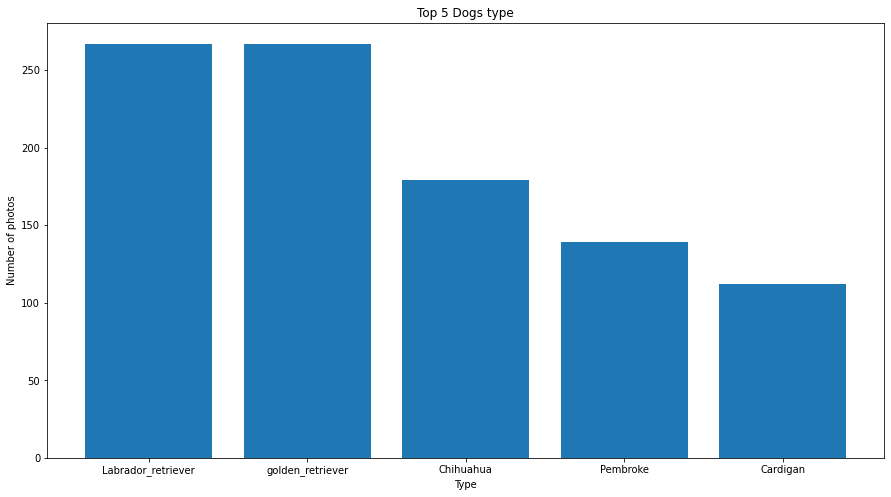

In [253]:
plt.bar(range( 5), allTypeUniqueValues.value_counts()[0:5].values, tick_label= allTypeUniqueValues.value_counts()[0:5].keys());
plt.gcf().set_size_inches(15, 8);
plt.title("Top 5 Dogs type");
plt.xlabel("Type");
plt.ylabel("Number of photos");

### 6.1.2 Insight #1- The top 5 uploaded dogs type are : Labrador retriever, Golden retriever, Chihuahua, Pembroke and Cardigan (This project is done by Eng.Shimaa Badawy @shbadawy)

## 6.2 Insight #2

### 6.2.1 Grouping data based on type to be able to get general insights about retweets and favorites for each type

In [254]:
groupedData= df.groupby(['type_name'])
retweet_count = groupedData.describe()['retweet_count']['max'].sort_values(ascending=False)[0:5]
favorite_count = groupedData.describe()['favorite_count']['max'].sort_values(ascending=False)[0:5]


### 6.2.2 Visualization for top 5 Dogs type with highest retweet count

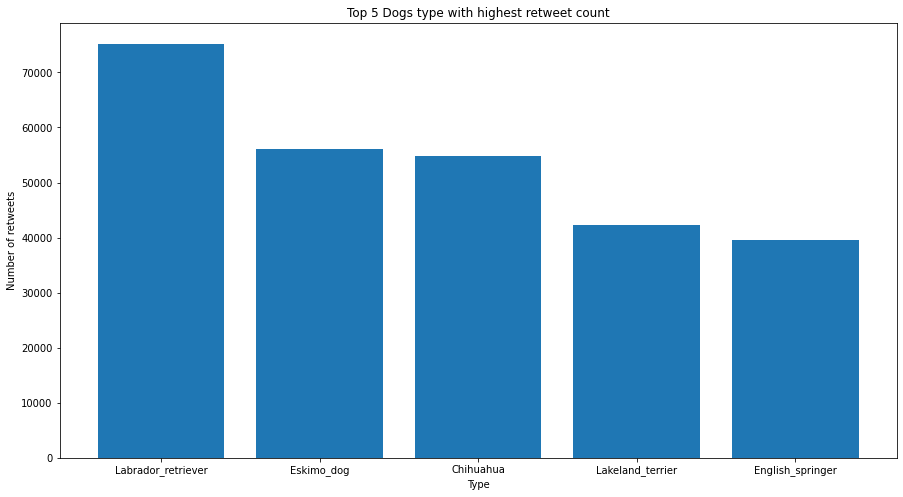

In [255]:
plt.bar(range(5),retweet_count.values, tick_label = retweet_count.keys())
plt.gcf().set_size_inches(15, 8);
plt.title("Top 5 Dogs type with highest retweet count");
plt.xlabel("Type");
plt.ylabel("Number of retweets");

### 6.2.3 Insight #2- The top 5 dogs type that have the highest retweets are : Labrador retriever,Eskimo dog,  Chihuahua, Lakeland terrier and English springer

## 6.3 Insight #3

### 6.3.1 Visualization for top 5 Dogs type with highest favorite count

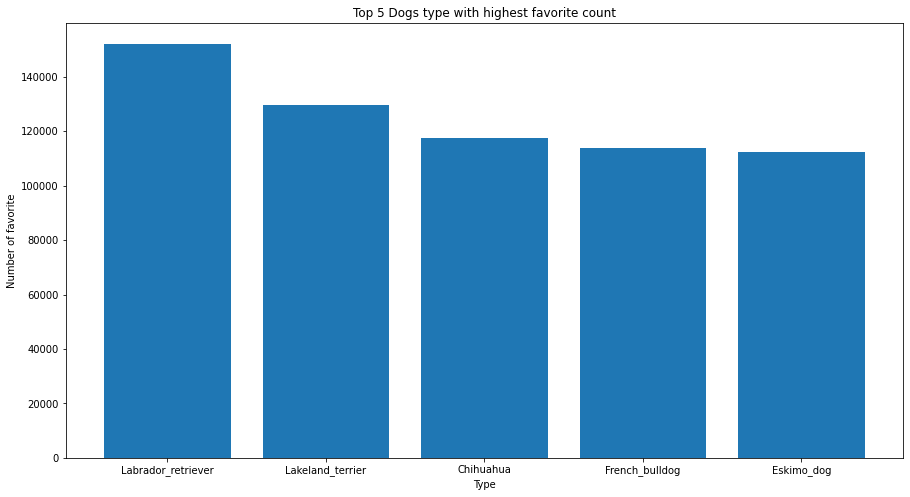

In [256]:
plt.bar(range(5),favorite_count.values, tick_label = favorite_count.keys())
plt.gcf().set_size_inches(15, 8);
plt.title("Top 5 Dogs type with highest favorite count");
plt.xlabel("Type");
plt.ylabel("Number of favorite");

### 6.3.2 Insight #3- The top 5 dogs type that have the highest favorite are : Labrador retriever,  Lakeland terrier  Chihuahua, French bulldog and Eskimo dog